In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('C:/Users/jhjjh/Downloads/Tetuan City power consumption.csv')
data.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [43]:
data.drop('DateTime', axis=1)

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [51]:
data.isnull().sum()

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

In [52]:
X = data.iloc[:,[0,1,2,3,4]].values
y = data.iloc[:,5].values

In [53]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 

In [54]:
X_train.shape

(41932, 5)

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (5,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                384       
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [56]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
1311/1311 [==============================] - 5s 3ms/step - loss: 1825620.6250 - mse: 1825620.6250 - val_loss: 1618112.6250 - val_mse: 1618112.6250
Epoch 2/100
1311/1311 [==============================] - 4s 3ms/step - loss: 1340755.5000 - mse: 1340755.5000 - val_loss: 1946961.0000 - val_mse: 1946961.0000
Epoch 3/100
1311/1311 [==============================] - 4s 3ms/step - loss: 1215529.1250 - mse: 1215529.1250 - val_loss: 1345682.1250 - val_mse: 1345682.1250
Epoch 4/100
1311/1311 [==============================] - 4s 3ms/step - loss: 1153394.1250 - mse: 1153394.1250 - val_loss: 1108231.0000 - val_mse: 1108231.0000
Epoch 5/100
1311/1311 [==============================] - 4s 3ms/step - loss: 1123989.2500 - mse: 1123989.2500 - val_loss: 1092183.8750 - val_mse: 1092183.8750
Epoch 6/100
1311/1311 [==============================] - 4s 3ms/step - loss: 1097622.6250 - mse: 1097622.6250 - val_loss: 1308486.7500 - val_mse: 1308486.7500
Epoch 7/100
1311/1311 [=======================

1311/1311 [==============================] - 4s 3ms/step - loss: 851759.5625 - mse: 851759.5625 - val_loss: 854444.1875 - val_mse: 854444.1875
Epoch 54/100
1311/1311 [==============================] - 4s 3ms/step - loss: 857915.1875 - mse: 857915.1875 - val_loss: 961056.3125 - val_mse: 961056.3125
Epoch 55/100
1311/1311 [==============================] - 4s 3ms/step - loss: 847060.6250 - mse: 847060.6250 - val_loss: 848691.1875 - val_mse: 848691.1875
Epoch 56/100
1311/1311 [==============================] - 4s 3ms/step - loss: 851864.5625 - mse: 851864.5625 - val_loss: 834859.7500 - val_mse: 834859.7500
Epoch 57/100
1311/1311 [==============================] - 4s 3ms/step - loss: 844819.1250 - mse: 844819.1250 - val_loss: 840961.5625 - val_mse: 840961.5625
Epoch 58/100
1311/1311 [==============================] - 4s 3ms/step - loss: 848282.2500 - mse: 848282.2500 - val_loss: 869879.3125 - val_mse: 869879.3125
Epoch 59/100
1311/1311 [==============================] - 4s 3ms/step - loss:

In [57]:
model.fit(X_train, y_train, epochs=N_EPOCHS, batch_size=64, verbose=0)
model.evaluate(X_test, y_test)

328/328 [==============================] - 1s 3ms/step - loss: 761175.4375 - mse: 761175.4375


[761175.4375, 761175.4375]

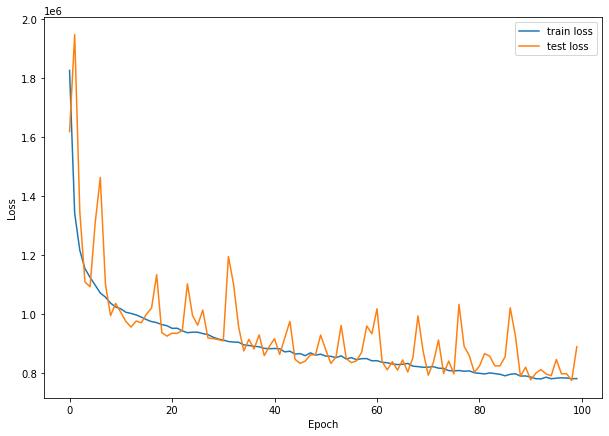

In [58]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

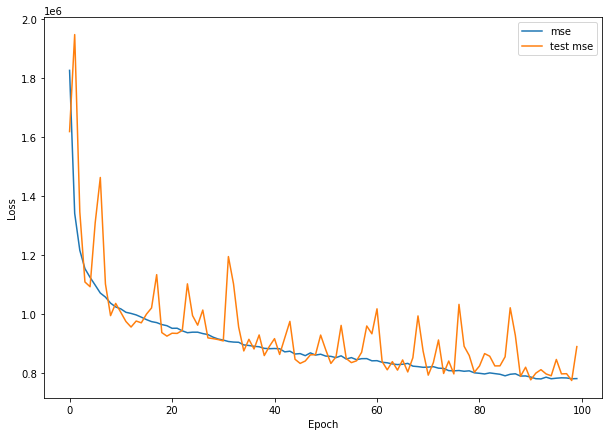

In [59]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()